In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
data_arabica = pd.read_csv("./arabica_data_cleaned.csv")
data_robusta = pd.read_csv("./robusta_data_cleaned.csv")

## Preprocessing Function

In [3]:
def preprocessing_train(data_arabica, data_robusta):
    data_robusta.rename(
    {
        'Fragrance...Aroma': 'Aroma', 
        'Salt...Acid': 'Acidity', 
        'Bitter...Sweet': 'Sweetness', 
        'Mouthfeel': 'Body', 
        'Uniform.Cup': 'Uniformity'
    }, 
    axis=1, inplace=True)
    
    data = pd.concat([data_arabica, data_robusta], axis=0)
    
    df = data[
            ['Aroma', 
             'Flavor', 
             'Aftertaste', 
             'Acidity', 
             'Body', 
             'Balance', 
             'Uniformity', 
             'Clean.Cup', 
             'Sweetness', 
             'Cupper.Points', 
             'Category.One.Defects', 
             'Quakers',
             'Category.Two.Defects', 
             'Species']]
    df = df.reset_index()
    df = df.drop("index", axis = 1)
    

    df['Green.Beans.Grade'] = df["Category.One.Defects"].values + df["Category.Two.Defects"].values + df["Quakers"].values
    
    df = df.dropna()
    df = df.reset_index()
    df = df.drop("index", axis = 1)

    model_df = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
           'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Species',
           'Green.Beans.Grade']]
    df1 = model_df.loc[model_df["Species"] == "Robusta"]
    frames = [model_df, df1, df1, df1, df1, df1, df1, df1, df1]
    model_df = pd.concat(frames)
    
    df = model_df.copy()

    le_species = LabelEncoder()

    df['Species.n'] = le_species.fit_transform(df['Species'])
    
    df = df.drop(columns=['Species'])
    X = df.drop(columns=["Species.n"])
    Y = df["Species.n"]  
    
    return X, Y

In [4]:
X, y = preprocessing_train(data_arabica, data_robusta)

## Graph for finding optimal K

In [5]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

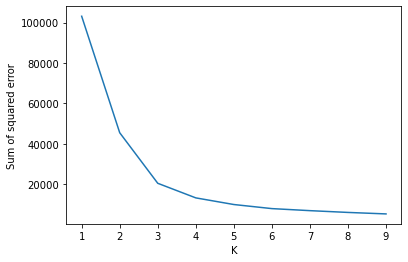

In [6]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## Hierarchical Clustering (For finding K)

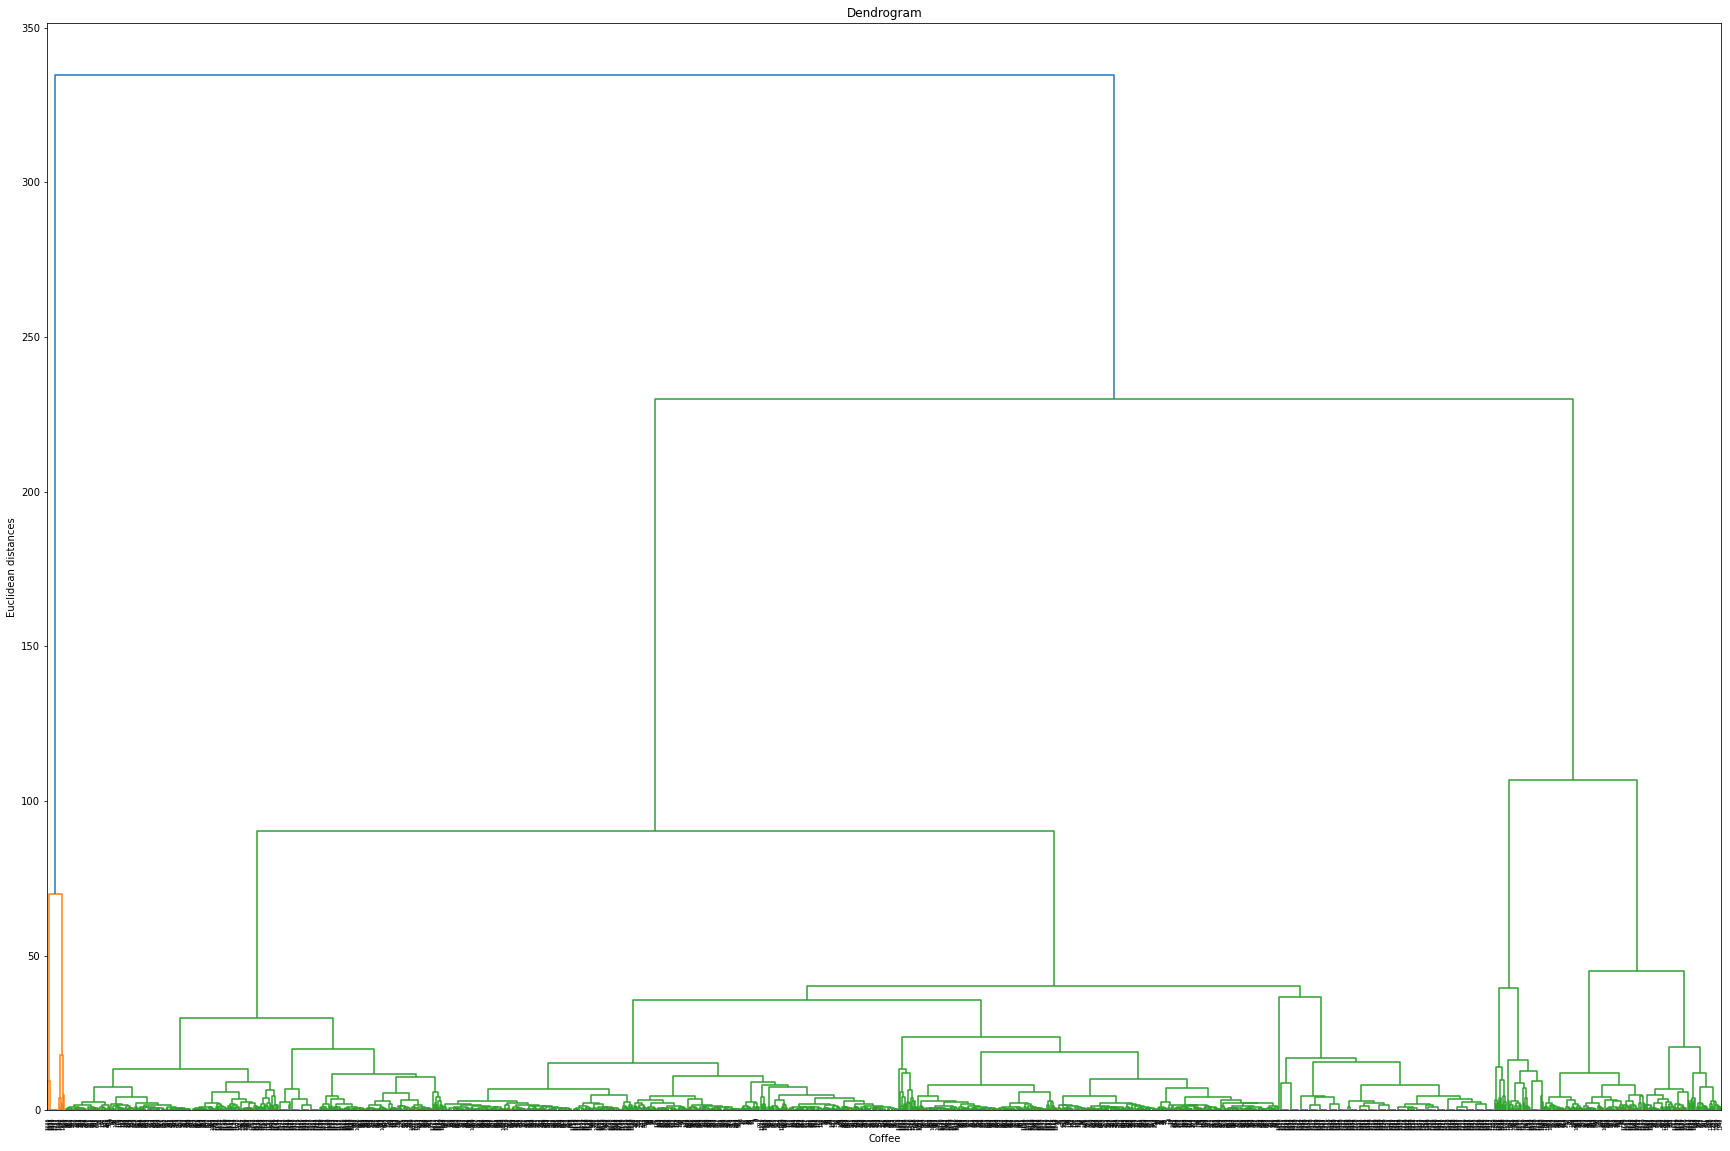

In [7]:
import scipy.cluster.hierarchy as sch
X_sch = X.iloc[:,:].values
plt.figure(figsize=(30,20))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Coffee')
plt.ylabel('Euclidean distances')
plt.show()

## KMeans Clustering

In [8]:
km=KMeans(n_clusters=2)
km.fit(X)
km.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [9]:
X.columns

Index(['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Green.Beans.Grade'],
      dtype='object')

Text(0.5, 1.0, 'kmeans')

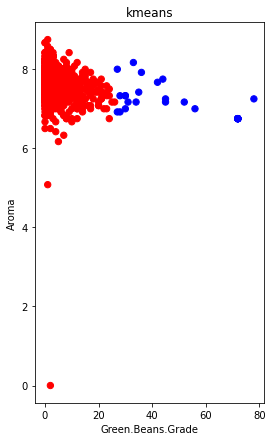

In [10]:
colormap=np.array(['red','blue'])
plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.scatter(X["Green.Beans.Grade"],X["Aroma"],c=colormap[km.labels_],s=40)
plt.xlabel("Green.Beans.Grade")
plt.ylabel("Aroma")
plt.title("kmeans")

## K Means Clustering With PCA

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
print("before PCA",X)
X_train = pca.fit_transform(X)
print("after PCA",X_train)

before PCA       Aroma  Flavor  Aftertaste  Acidity  Body  Balance  Uniformity  \
0      8.67    8.83        8.67     8.75  8.50     8.42       10.00   
1      8.75    8.67        8.50     8.58  8.42     8.42       10.00   
2      8.42    8.50        8.42     8.42  8.33     8.42       10.00   
3      8.17    8.58        8.42     8.42  8.50     8.25       10.00   
4      8.25    8.50        8.25     8.50  8.42     8.33       10.00   
...     ...     ...         ...      ...   ...      ...         ...   
1333   7.75    7.58        7.33     7.58  5.08     7.83       10.00   
1334   7.50    7.67        7.75     7.75  5.17     5.25       10.00   
1335   7.33    7.33        7.17     7.42  7.50     7.17        9.33   
1336   7.42    6.83        6.75     7.17  7.25     7.00        9.33   
1337   6.75    6.67        6.50     6.83  6.92     6.83        9.33   

      Clean.Cup  Sweetness  Cupper.Points  Green.Beans.Grade  
0         10.00      10.00           8.75                0.0  
1         

In [12]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X_train)
    sse.append(km.inertia_)

In [13]:
km=KMeans(n_clusters=2)
km.fit(X_train)
km.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [14]:
X_train.shape

(1562, 2)

Text(0.5, 1.0, 'kmeans')

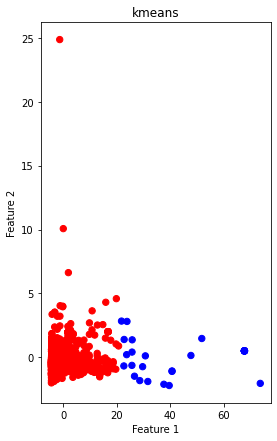

In [15]:
colormap=np.array(['red','blue'])
plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.scatter(X_train[:,0],X_train[:,1],c=colormap[km.labels_],s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("kmeans")